1316.8409611736695


Text(0.5,0,'redshift (km/s)')

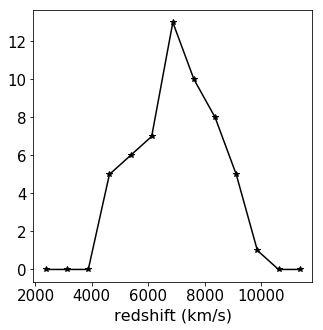

In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

def loadData(filename):
    '''
    Read fits data
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl

## the mean redshift of Coma cluster
#data (likelihood)
filename = 'ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[(coma.czA<20000) & (coma.czA>0)]   #czA: redshift, kick out the bad data which are negative or too large
print (np.std(cz))                               #redshift dispersion
#show the histogram of 55 data
zgrid =np.arange(2000.,12000.,750.)
zcenter = (zgrid[1:]+zgrid[:-1])/2. 
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(zcenter,h,'k*-')
ax.set_xlabel('redshift (km/s)',fontsize = 16)

In [2]:
#known sigma ask for mean redshift
import scipy.stats as stats

#parameters of data
n = len(cz)     #number of data  
sig = 1317.0    #known sigma of data
#superparameters of prior
tao_0 = 1000.0  #sigma of prior 
mu_0 = 6925.0   #mu of prior
#parameters of posterior
mu_1 = (1./tao_0**2*mu_0+n/sig**2*np.mean(cz))/(1./tao_0**2+n/sig**2)
tao_1 = 1/(1./tao_0**2+n/sig**2)

print (n, np.mean(cz), mu_1, np.sqrt(tao_1))
print (1./tao_0**2,n/sig**2)

55 7004.745454545455 7002.307473413571 174.84861685903368
1e-06 3.1709627446469826e-05


Text(0.5,0,'$\\mu$')

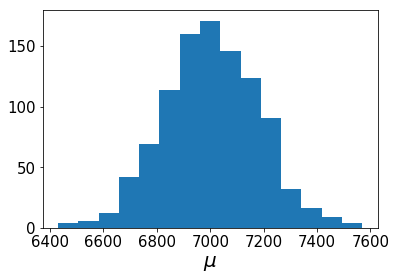

In [3]:
#p(mu|sigma,y)
N = 1000
mu = np.random.normal(mu_1, np.sqrt(tao_1),size=N)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mu,15)
ax.set_xlabel('$\mu$',fontsize=20)

Text(0,0.5,'$p(\\mu)$')

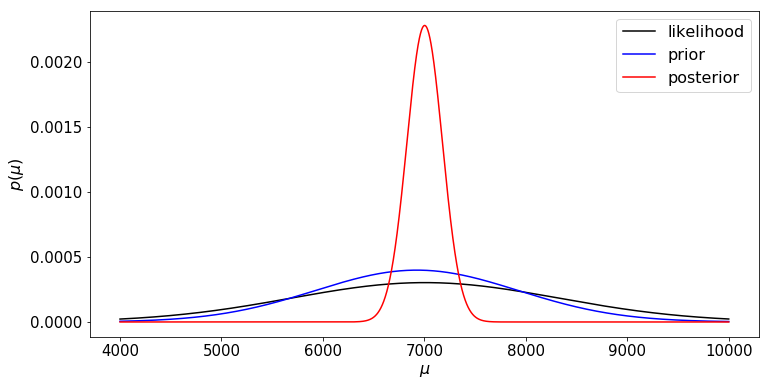

In [4]:
#show the figure of likelihood, prior and posterior
x = np.arange(4000,10000,1)
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.norm.pdf(x,loc = np.mean(cz), scale = sig),'k-')
e2, = ax.plot(x, stats.norm.pdf(x,loc = mu_0, scale = tao_0),'b-')
e3, = ax.plot(x, stats.norm.pdf(x,loc = mu_1, scale = np.sqrt(tao_1)),'r-')
plt.legend([e1,e2,e3],['likelihood','prior','posterior'],fontsize=16)
ax.set_xlabel(r'$\mu$',fontsize=16)
ax.set_ylabel(r'$p(\mu)$',fontsize=16)
